Зчитуємо данні, знаходимо потрібні дати підтвердження замовлення на форматуємо в денний формат

In [5]:
import pandas as pd

order_items = pd.read_csv('order_items.csv')
orders = pd.read_csv('orders.csv')
temp = pd.merge(order_items, orders, on='order_id', how='inner')
order_items['date'] = pd.to_datetime(temp['order_purchase_timestamp']).dt.to_period("d")
order_items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,2018-04-23
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,2018-07-14
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,2017-10-23
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,2017-08-14


Визначаємо період наявних даних та знаходимо період для прогназування (за умовоб 14 днів через 7 днів після останнбої дати)

In [6]:
period = pd.date_range(min(order_items['date']).to_timestamp(), max(order_items['date']).to_timestamp())
period                  

DatetimeIndex(['2016-09-04', '2016-09-05', '2016-09-06', '2016-09-07',
               '2016-09-08', '2016-09-09', '2016-09-10', '2016-09-11',
               '2016-09-12', '2016-09-13',
               ...
               '2018-08-25', '2018-08-26', '2018-08-27', '2018-08-28',
               '2018-08-29', '2018-08-30', '2018-08-31', '2018-09-01',
               '2018-09-02', '2018-09-03'],
              dtype='datetime64[ns]', length=730, freq='D')

In [7]:
forecast_period = pd.date_range(period[-1] + pd.DateOffset(7), periods=14, freq="D")
forecast_period

DatetimeIndex(['2018-09-10', '2018-09-11', '2018-09-12', '2018-09-13',
               '2018-09-14', '2018-09-15', '2018-09-16', '2018-09-17',
               '2018-09-18', '2018-09-19', '2018-09-20', '2018-09-21',
               '2018-09-22', '2018-09-23'],
              dtype='datetime64[ns]', freq='D')

Для кожного замовлення визначаємо назву категорії (англійською для зраучності).
Це потрібно на випадок, якщо необхідно буде проаналізувати попита окремо для кожної групи товарів

In [8]:
prod = pd.read_csv('products.csv')
prod_trans = pd.read_csv('product_category_name_translation.csv')
df = pd.merge(order_items[['product_id', 'date']], prod[['product_id', 'product_category_name']], on='product_id', how='inner')
df = pd.merge(df[['date', 'product_category_name']], prod_trans[['product_category_name', 'product_category_name_english']], on='product_category_name', how='inner')
df = df[['date', 'product_category_name_english']]
df.columns = ['date', 'category']
df

,date,category
0,2017-09-13,cool_stuff
1,2017-04-26,pet_shop
2,2018-01-14,furniture_decor
3,2018-08-08,perfumery
4,2017-02-04,garden_tools
...,...,...
111018,2018-04-23,housewares
111019,2018-07-14,computers_accessories
111020,2017-10-23,sports_leisure
111021,2017-08-14,computers_accessories


Для роботи з часовими рядами було обрано бібліотеку sktime

In [9]:
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.neuralforecast import NeuralForecastLSTM
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_scaled_error
from sktime.utils.plotting import plot_series

Знаходимо щоденний попит на усі товари на візуалізуємо його

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='demand'>)

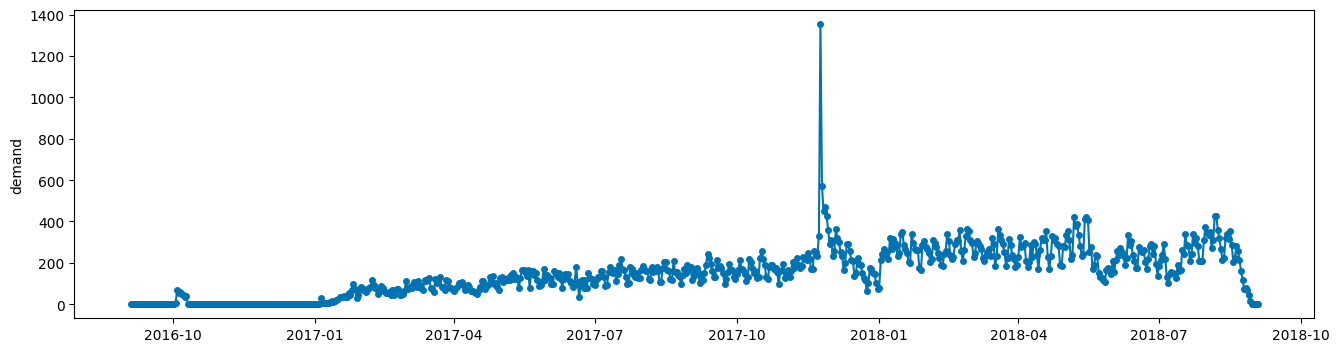

In [10]:
y = df.groupby('date').count()
y = y.reindex(index = period.to_period(), fill_value=0)
y.columns = ['demand']

plot_series(y)

Ділимо дані на тренувальні та тестові. Це необхідно для оцінки якості моделей. У якості тестової вибірки було обрано останні 21 день з усіх данних, оскільки саме стільки нам необхідно спрогнозувати днів за умовою

In [11]:
y_train, y_test = temporal_train_test_split(y, test_size=21)

У якості класичної моделі було обрано модель ExponentialSmoothing яка швидко реагує на останні зміни у часовому ряді, а тому добра підходить для прогнозування короткострокового періоду.

In [12]:
exp_model = ExponentialSmoothing(sp = 7, trend="add", seasonal="add")
exp_model.fit(y_train)

ExponentialSmoothing(seasonal='add', sp=7, trend='add')

На графіку синім можна побачити справжній попит на товари, помаранчевим - спрогнозований попит.
MASE = 9.572391035336175
Не ідеальний результат, але це виправдано аномальним різким падінням попиту у цей період, що неможливо спрогнозувати

C:\Users\slova\AppData\Local\Temp\ipykernel_10164\2750568329.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_pred = y_pred.applymap(lambda x: x if x >= 0 else 0)


9.572391035336175

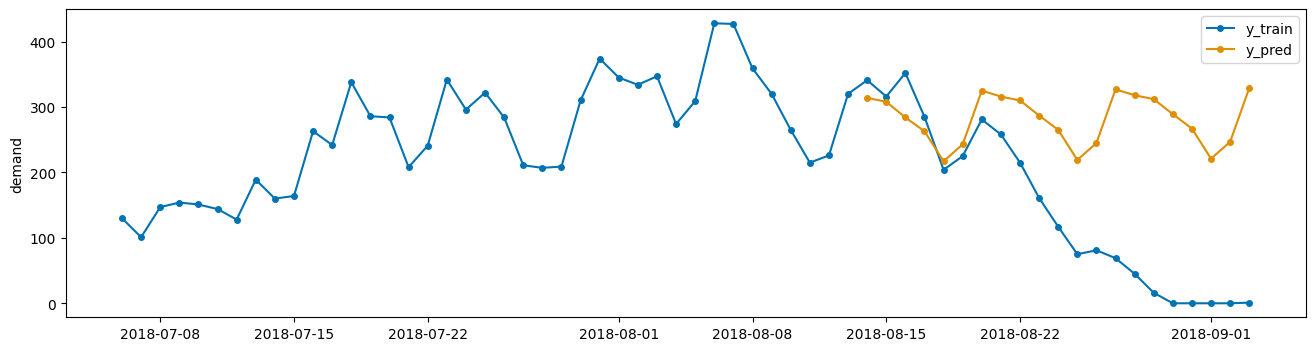

In [13]:
y_pred = exp_model.predict(y_test.index)
y_pred = y_pred.astype(int)
y_pred = y_pred.applymap(lambda x: x if x >= 0 else 0)
plot_series(y.tail(60), y_pred, labels=['y_train', 'y_pred'])
mean_absolute_scaled_error(y_train= y_train, y_true=y.head(21), y_pred=y_pred)

На наступному графіку помаранчевим намалбований графік попиту на необхідний короткостроковий перод з умови.

C:\Users\slova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sktime\forecasting\base\_base.py:2074: UserWarning: NotImplementedWarning: ExponentialSmoothing does not have a custom `update` method implemented. ExponentialSmoothing will be refit each time `update` is called with update_params=True. To refit less often, use the wrappers in the forecasting.stream module, e.g., UpdateEvery.
  warn(
C:\Users\slova\AppData\Local\Temp\ipykernel_10164\4293339920.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_forecast = y_forecast.applymap(lambda x: x if x >= 0 else 0)


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='demand'>)

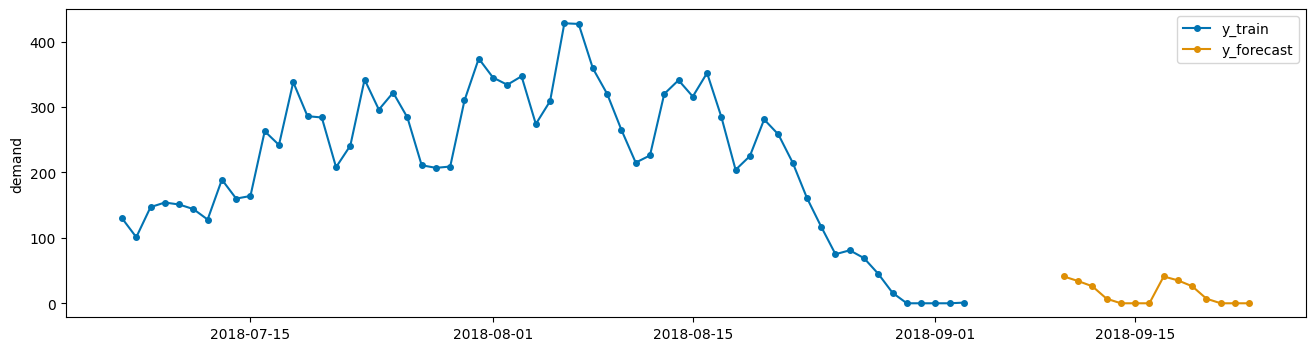

In [14]:
exp_model.update(y_test)
y_forecast = exp_model.predict(forecast_period)
y_forecast = y_forecast.astype(int)
y_forecast = y_forecast.applymap(lambda x: x if x >= 0 else 0)
plot_series(y.tail(60), y_forecast, labels=['y_train', 'y_forecast'])

У якості моделі машинного начвання було обрано Long-Short Term Memory model, оскільки вона, на відміну від звичайних рекурсивних нейроних мереж, краще враховує довготривалі закономірності, вона більш стійка до часових пробілів (а у нас такі наявні), а також відсутня проблема затухаючого градієнту.

In [15]:
import numpy as np

lstm_model = NeuralForecastLSTM(max_steps=1000) 
lstm_model.fit(y_train, fh = np.arange(1,22))

Seed set to 1
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 484 K  | train
4 | context_adapter | Linear        | 42.2 K | train
5 | mlp_decoder     | MLP           | 2.4 K  | train
----------------------------------------------------------
528 K     Trainable params
0         Non-trainable params
528 K     Total params
2.114     Total estimated model params size (MB)


Epoch 999: 100%|██████████| 1/1 [00:00<00:00, 10.14it/s, v_num=41, train_loss_step=0.361, train_loss_epoch=0.361]

`Trainer.fit` stopped: `max_steps=1000` reached.


Epoch 999: 100%|██████████| 1/1 [00:00<00:00,  9.25it/s, v_num=41, train_loss_step=0.361, train_loss_epoch=0.361]


NeuralForecastLSTM()

Нижче синім кольром позначений реальний попит, помарачневим - спрогнозований
МАSЕ = 7.336669874879693

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 16.75it/s]


C:\Users\slova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\neuralforecast\core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
C:\Users\slova\AppData\Local\Temp\ipykernel_10164\1979978573.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_pred = y_pred.applymap(lambda x: x if x >= 0 else 0)


7.336669874879693

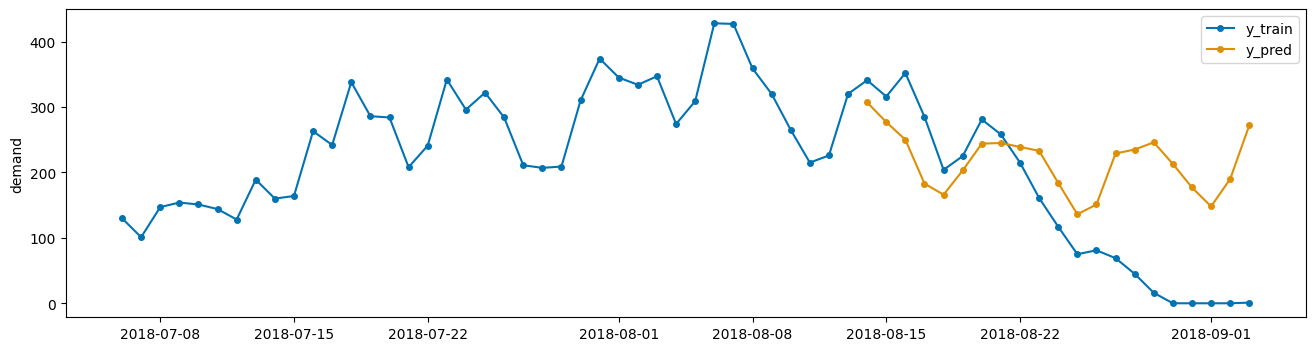

In [17]:
y_pred = lstm_model.predict(np.arange(1,22))
y_pred = y_pred.astype(int)
y_pred = y_pred.applymap(lambda x: x if x >= 0 else 0)
plot_series(y.tail(60), y_pred, labels=['y_train', 'y_pred'])
mean_absolute_scaled_error(y_train= y_train, y_true=y.head(21), y_pred=y_pred)

Додаємо нові дані в модель та прогнозуємо на зазначений в умові період

C:\Users\slova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sktime\forecasting\base\_base.py:2074: UserWarning: NotImplementedWarning: NeuralForecastLSTM does not have a custom `update` method implemented. NeuralForecastLSTM will be refit each time `update` is called with update_params=True. To refit less often, use the wrappers in the forecasting.stream module, e.g., UpdateEvery.
  warn(
Seed set to 1


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs

  | Name            | Type          | Params | Mode 
----------------------------------------------------------
0 | loss            | MAE           | 0      | train
1 | padder          | ConstantPad1d | 0      | train
2 | scaler          | TemporalNorm  | 0      | train
3 | hist_encoder    | LSTM          | 484 K  | train
4 | context_adapter | Linear        | 42.2 K | train
5 | mlp_decoder     | MLP           | 2.4 K  | train
----------------------------------------------------------
528 K     Trainable params
0         Non-trainable params
528 K     Total params
2.114     Total estimated model params size (MB)


Epoch 529:   0%|          | 0/1 [00:00<?, ?it/s, v_num=39, train_loss_step=0.266, train_loss_epoch=0.266]        

C:\Users\slova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pytorch_lightning\trainer\call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


Predicting DataLoader 0: 100%|██████████| 1/1 [00:00<00:00, 25.00it/s]


C:\Users\slova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\neuralforecast\core.py:199: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(
C:\Users\slova\AppData\Local\Temp\ipykernel_37644\449762645.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  y_forecast = y_forecast.applymap(lambda x: x if x >= 0 else 0)


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='demand'>)

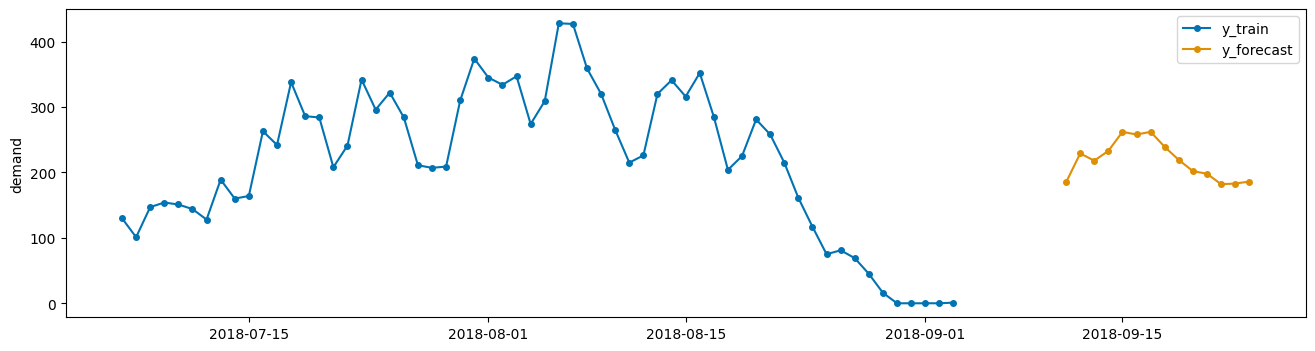

In [144]:
lstm_model.update(y_test)
y_forecast = lstm_model.predict(np.arange(1,22))[7:]
y_forecast = y_forecast.astype(int)
y_forecast = y_forecast.applymap(lambda x: x if x >= 0 else 0)
plot_series(y.tail(60), y_forecast, labels=['y_train', 'y_forecast'])